# Data Preparation

Ini adalah tahap di mana dilakukan proses transformasi pada data sehingga menjadi bentuk yang cocok untuk proses pemodelan. Ada beberapa tahapan yang umum dilakukan pada data preparation, antara lain, seleksi fitur, transformasi data, feature engineering, dan dimensionality reduction. 

Pada bagian ini akan dilakukan empat tahap persiapan data, yaitu:

1. Encoding fitur kategori.
2. Reduksi dimensi dengan Principal Component Analysis (PCA).
3. Pembagian dataset dengan fungsi train_test_split dari library sklearn.
4. Normalisasi.

### Import

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

In [5]:
# Persiapan
dataset_path = "datasets/diamonds_dataset_after_EDA.csv"
diamonds_dataset = pd.read_csv(dataset_path)
diamonds_dataset

,Unnamed: 0,carat,cut,color,clarity,table,price,x,y,z
0,0,0.23,Ideal,E,SI2,55.0,326,3.95,3.98,2.43
1,1,0.21,Premium,E,SI1,61.0,326,3.89,3.84,2.31
2,3,0.29,Premium,I,VS2,58.0,334,4.20,4.23,2.63
3,4,0.31,Good,J,SI2,58.0,335,4.34,4.35,2.75
4,5,0.24,Very Good,J,VVS2,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...,...
47086,53935,0.72,Ideal,D,SI1,57.0,2757,5.75,5.76,3.50
47087,53936,0.72,Good,D,SI1,55.0,2757,5.69,5.75,3.61
47088,53937,0.70,Very Good,D,SI1,60.0,2757,5.66,5.68,3.56
47089,53938,0.86,Premium,H,SI2,58.0,2757,6.15,6.12,3.74


In [6]:

numerical_features = ['price', 'carat', 'depth', 'table', 'x', 'y', 'z']
categorical_features = ['cut', 'color', 'clarity']

### Encoding Categorical Feature

Semua fitur kategori dilakukan encoding menggunakan teknik `one-hot-encoding`

In [7]:
from sklearn.preprocessing import OneHotEncoder

for feature in categorical_features:
    diamonds_dataset = pd.concat([diamonds_dataset, pd.get_dummies(diamonds_dataset[feature], prefix=feature)],axis=1)

diamonds_dataset.drop(['cut','color','clarity'], axis=1, inplace=True)
diamonds_dataset.head()

,Unnamed: 0,carat,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0,0.23,55.0,326,3.95,3.98,2.43,False,False,True,...,False,False,False,False,False,True,False,False,False,False
1,1,0.21,61.0,326,3.89,3.84,2.31,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,3,0.29,58.0,334,4.20,4.23,2.63,False,False,False,...,True,False,False,False,False,False,False,True,False,False
3,4,0.31,58.0,335,4.34,4.35,2.75,False,True,False,...,False,True,False,False,False,True,False,False,False,False
4,5,0.24,57.0,336,3.94,3.96,2.48,False,False,False,...,False,True,False,False,False,False,False,False,False,True


### Reduksi Dimensi dengan PCA

PCA adalah eknik untuk mereduksi dimensi, mengekstraksi fitur, dan mentransformasi data dari “n-dimensional space” ke dalam sistem berkoordinat baru dengan dimensi `m`, di mana `m < n`.

PCA bekerja menggunakan metode aljabar linier. Ia mengasumsikan bahwa sekumpulan data pada arah dengan varians terbesar merupakan yang paling penting (utama). PCA umumnya digunakan ketika variabel dalam data memiliki korelasi yang tinggi. Korelasi tinggi ini menunjukkan data yang berulang atau redundant. 

Penjelasan untuk masing-masing komponen utama (PC):

- PC pertama mewakili arah varians maksimum dalam data. Ia paling banyak menangkap informasi dari semua fitur dalam data. 
- PC kedua menangkap sebagian besar informasi yang tersisa setelah PC pertama. 
- PC ketiga menangkap sebagian besar informasi yang tersisa setelah PC pertama, PC kedua, dst.

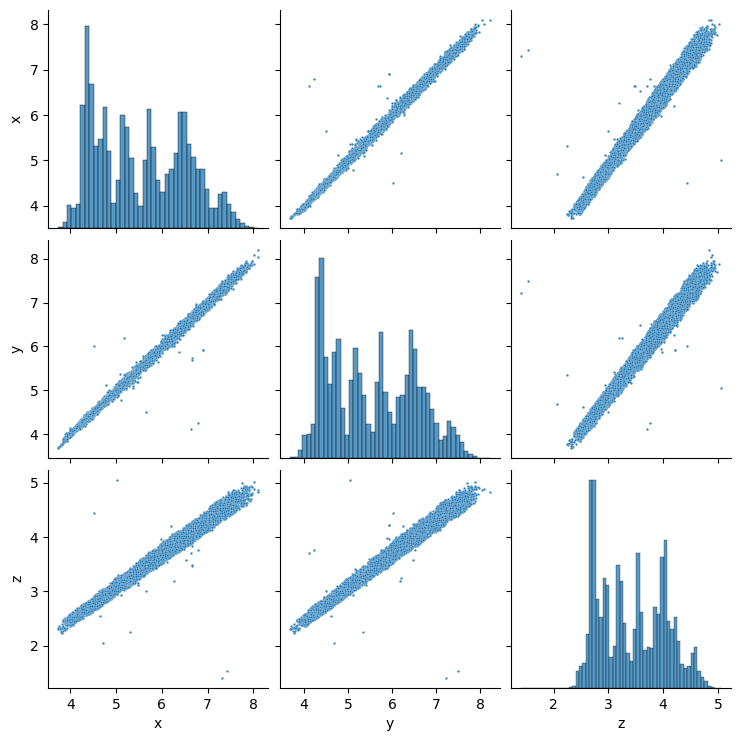

In [8]:
# Fitur x, y, dan z adalah fitur yang berkolerasi tinggi dengan fitur price
# Fitur x, y, dan z merupakan fitur yang mentimpan informasi ukuran berlian
sns.pairplot(diamonds_dataset[['x','y','z']], plot_kws={"s": 3});

In [9]:
from sklearn.decomposition import PCA
 
pca = PCA(n_components=3, random_state=123)
pca.fit(diamonds_dataset[['x','y','z']])
principle_component = pca.transform(diamonds_dataset[['x','y','z']])

In [10]:
# Mengecek proporsi informasi dari setiap komponen

pca.explained_variance_ratio_.round(3)

array([0.998, 0.002, 0.001])

Berdasarkan hasil tersebut, akan direduksi fitur (dimensi) dan hanya mempertahankan PC (komponen) pertama saja. PC pertama ini akan menjadi fitur dimensi atau ukuran berlian menggantikan ketiga fitur lainnya ('x', 'y', 'z'). Kita beri nama fitur ini `'dimension'`.

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1, random_state=123)
pca.fit(diamonds_dataset[['x','y','z']])
diamonds_dataset['dimension'] = pca.transform(diamonds_dataset.loc[:, ('x','y','z')]).flatten()

# Fitur x, y, dan z tidak lagi dibutuhkan 
diamonds_dataset.drop(['x','y','z'], axis=1, inplace=True)

In [12]:
diamonds_dataset.head()

,Unnamed: 0,carat,table,price,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,...,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,dimension
0,0,0.23,55.0,326,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,-2.445294
1,1,0.21,61.0,326,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,-2.622793
2,3,0.29,58.0,334,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,-2.041229
3,4,0.31,58.0,335,False,True,False,False,False,False,...,True,False,False,False,True,False,False,False,False,-1.824667
4,5,0.24,57.0,336,False,False,False,False,True,False,...,True,False,False,False,False,False,False,False,True,-2.444679


### Train-Test-Split

Digunakan proporsi pembagian sebesar 90:10 dengan fungsi `train_test_split` dari sklearn. 

In [13]:
from sklearn.model_selection import train_test_split
 
FEATURE_X = diamonds_dataset.drop(["price"],axis =1)
destined_y = diamonds_dataset["price"]
X_train, X_test, y_train, y_test = train_test_split(FEATURE_X, destined_y, test_size = 0.1, random_state = 123)

In [14]:
print(f'Total # of sample in whole dataset: {len(FEATURE_X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 47091
Total # of sample in train dataset: 42381
Total # of sample in test dataset: 4710


### Normalization

Normalisasi adalah teknik transformasi yang paling umum digunakan dalam tahap persiapan pemodelan. Untuk fitur numerik, tidak dilakukan transformasi dengan one-hot-encoding seperti pada fitur kategori. Digunakan teknik StandarScaler dari library Scikitlearn.

StandardScaler melakukan proses standarisasi fitur dengan mengurangkan mean (nilai rata-rata) kemudian membaginya dengan standar deviasi untuk menggeser distribusi.  StandardScaler menghasilkan distribusi dengan standar deviasi sama dengan 1 dan mean sama dengan 0. Sekitar 68% dari nilai akan berada di antara -1 dan 1.

Diterapkan normalisasi pada data train. Kemudian, pada tahap evaluasi, data test akan dinormalisasi.

In [15]:
from sklearn.preprocessing import StandardScaler
 
numerical_features = ['carat', 'table', 'dimension']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,carat,table,dimension
10375,0.522918,-0.615777,0.624890
17587,0.956754,0.378163,0.976515
15081,0.821180,-0.118807,0.926818
25542,-0.887050,-1.758809,-0.887686
15684,0.794065,0.378163,0.848221


In [16]:
# Mengecek mean dan st.dev
X_train[numerical_features].describe().round(4)

,carat,table,dimension
count,42381.0000,42381.0000,42381.0000
mean,0.0000,0.0000,-0.0000
std,1.0000,1.0000,1.0000
min,-1.3751,-2.6037,-1.8683
25%,-0.8871,-0.6158,-0.9263
50%,-0.2905,-0.1188,-0.1186
75%,0.8212,0.8751,0.8901
max,3.3429,3.1115,2.6266


Export data hasil data preparation

In [18]:
# dataset_path = "datasets/"
# X_train.to_csv(dataset_path+"X_train.csv")
# X_test.to_csv(dataset_path+"X_test.csv")
# y_train.to_csv(dataset_path+"y_train.csv")
# y_test.to_csv(dataset_path+"y_test.csv")